<a href="https://colab.research.google.com/github/jfb10d/ml-practice/blob/main/notebooks/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.18.0


In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2025-07-17 18:39:17--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.02s   

2025-07-17 18:39:18 (17.8 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2025-07-17 18:39:18--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [4]:
train = pd.read_csv(train_file_path, sep='\t',header=None, names=['label','message'])
test = pd.read_csv(test_file_path, sep='\t',header=None, names=['label','message'])
train.head()

,label,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [5]:
train.label = [1 if train.label[i] == 'spam' else 0 for i in range(len(train.label))]
test.label = [1 if test.label[i] == 'spam' else 0 for i in range(len(test.label))]
train.head()

,label,message
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...


In [6]:
train.isnull().sum()

,0
label,0
message,0


In [7]:
test.isnull().sum()

,0
label,0
message,0


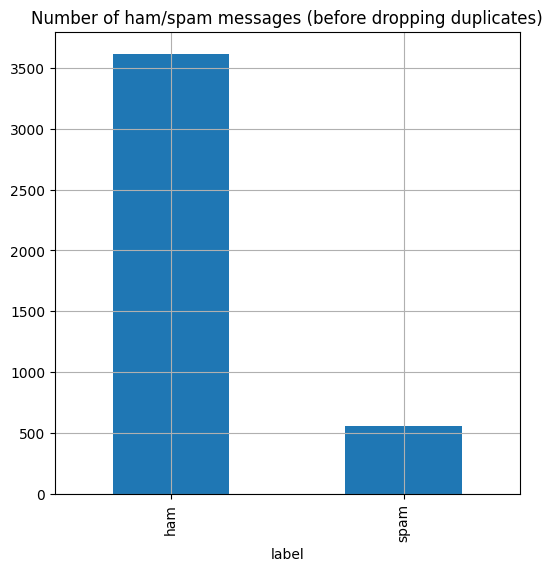

In [8]:
vc = train.label.value_counts()
fig,ax = plt.subplots(figsize=(6,6))
vc.plot(kind='bar',ax=ax)
ax.set_xticklabels(['ham','spam'])
ax.set_title('Number of ham/spam messages (before dropping duplicates)')
ax.grid()

In [9]:
max([len(i) for i in train.message]) # max length of messages

910

In [10]:
min(([len(i) for i in train.message]))

2

In [11]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

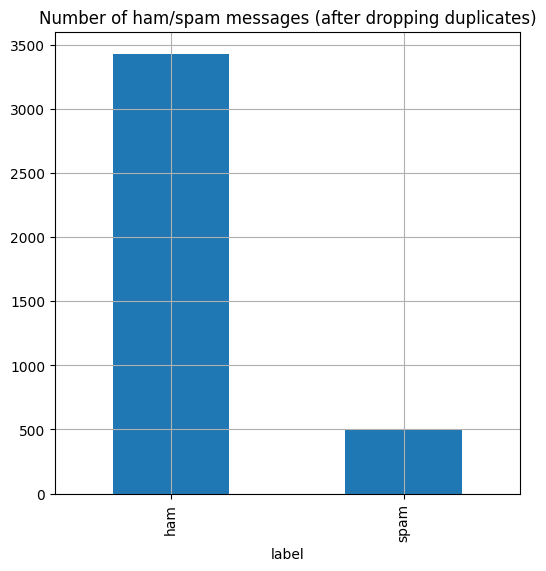

In [12]:
vc = train.label.value_counts()
fig,ax = plt.subplots(figsize=(6,6))
vc.plot(kind='bar',ax=ax)
ax.set_xticklabels(['ham','spam'])
ax.set_title('Number of ham/spam messages (after dropping duplicates)')
ax.grid()

In [13]:
train_data = tf.data.Dataset.from_tensor_slices(
    (train.message.values, train.label.values)
)
test_data = tf.data.Dataset.from_tensor_slices(
    (test.message.values, test.label.values)
)

In [14]:
BUFFER_SIZE = 100
BATCH_SIZE = 32
train_set = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_set = test_data.batch(BATCH_SIZE)

In [15]:
for example, label in train_set.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'i need to come home and give you some good lovin...'
 b"nope, i'm still in the market"
 b'message important information for o2 user. today is your lucky day! 2 find out why log onto http://www.urawinner.com there is a fantastic surprise awaiting you']

labels:  [0 0 1]


In [16]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_set.map(lambda text, label: text))

In [17]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'i', 'to', 'you', 'a', 'the', 'u', 'and', 'in', 'is',
       'me', 'my', 'for', 'your', 'of', 'it', 'have', 'on', 'call'],
      dtype='<U15')

In [18]:
encoded_example = encoder(example)[:5].numpy()
encoded_example

array([[  2,  78,   3,  61,  84,   8, 135,   4, 112,  60,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [695,  22,  82,   9,   6,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [175, 456, 826,  13,   1, 955,  91,  10,  14, 553,  68,  24, 171,
         49, 155, 699,   1,   1,  71,  10,   5, 916, 877, 936,   4,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [323,  18,  20,  68,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [533,  93, 818,  56,   1, 394,  44,  85, 189,   3,  42,   1, 420,
        465,   1,  66,   1,   1,   1,   1,   1,

**Build Model**

In [19]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        len(encoder.get_vocabulary()),
        64,
        mask_zero=True,
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True, use_cudnn=False)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, use_cudnn=False)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (32, None)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy'],
)

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)
history = model.fit(
    train_set,
    validation_data=test_set,
    validation_steps=30,
    epochs=20,
    callbacks=[callback]
)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 33s 158ms/step - accuracy: 0.8319 - loss: 0.6507 - val_accuracy: 0.8656 - val_loss: 0.4731
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.8728 - loss: 0.4157 - val_accuracy: 0.9073 - val_loss: 0.2307
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.9521 - loss: 0.1834 - val_accuracy: 0.9729 - val_loss: 0.1113
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.9772 - loss: 0.0918 - val_accuracy: 0.9812 - val_loss: 0.0772
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.9880 - loss: 0.0611 - val_accuracy: 0.9812 - val_loss: 0.0694
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 38s 149ms/step - accuracy: 0.9886 - loss: 0.0514 - val_accuracy: 0.9823 - val_loss: 0.0641


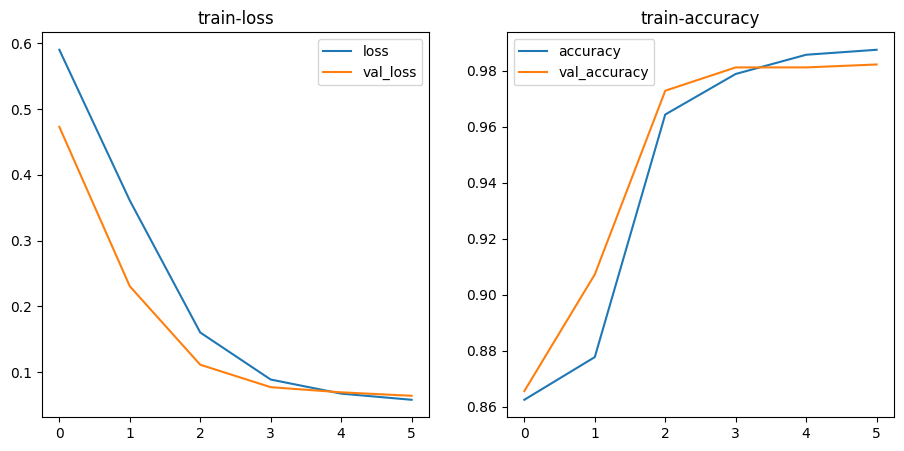

In [22]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
for i, metric in enumerate(['loss','accuracy']):
  ax[i].plot(history.history[metric], label=metric)
  ax[i].plot(history.history[f'val_{metric}'], label=f'val_{metric}')
  ax[i].set_title(f'train-{metric}')
  ax[i].legend()

In [23]:
test_loss, test_acc = model.evaluate(test_set)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9828 - loss: 0.0649
Test Loss: 0.06527582556009293
Test Accuracy: 0.9814677834510803


In [28]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  if not isinstance(pred_text, list):
    pred_text = [pred_text]
  input_data = tf.data.Dataset.from_tensor_slices(pred_text).batch(1)
  pred = float(model.predict(input_data)[0][0])
  prediction = [pred, 'ham' if pred < 0.5 else 'spam']
  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0.005466108676046133, 'ham']


In [29]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
You passed the challenge. Great job!
